In [2]:
import xarray as xr
import pandas as pd
import dask.array as da
from dask import delayed
import os
import matplotlib.pyplot as plt

In [ ]:
# Files name list from goes .nc folder
directory = 'D:/RODRIGO/IntradayForecasting/content/GOES_Files/CMIPF_sliced_resized/'
Band = 2

if Band<10:
    band_str = 'M6C0' + str(Band)
else:
    band_str = 'M6C' + str(Band)
ncs = [f'{directory}/{i}' 
       for i in os.listdir(directory) 
       if i.endswith('.nc') 
       and band_str in i
       # Select only files each hour (starting at hh:00)
       and i.split('_')[3][10:12] == '00']
ncs

In [ ]:
# Trim and reescale images 
das = []
# target_x_res = 200
# target_y_res = 200
for nc in ncs:
    ds = delayed(xr.open_dataset)(nc) 
    # print(nc)
    # ds_sel = delayed(ds.sel)(x=slice(-0.05, 0.07), y=slice(0.09, -0.03))
    # original_x_size = delayed(ds_sel.dims['x'])
    # original_y_size = delayed(ds_sel.dims['y'])
    # scale_factor_x = delayed(lambda ox: max(ox // target_x_res, 1))(original_x_size)
    # scale_factor_y = delayed(lambda oy: max(oy // target_y_res, 1))(original_y_size)
    
    # # Apply the downscaling factor to each image
    # ds_downscaled = delayed(ds_sel.coarsen)(x=scale_factor_x, y=scale_factor_y, boundary="trim").mean()
    
    das.append(ds)

# concatenation 
ds_col = delayed(xr.concat)(das, dim='t')

# Convert to a Dask array for processing
ds_col = ds_col.compute()
ds_col

In [ ]:
# Save the dataset to a NetCDF file
output_path = 'D:/RODRIGO/IntradayForecasting/content/GOES_Files/combined_data_B02.nc'
ds_col.to_netcdf(output_path)

In [ ]:
# Load a dataset from a NetCDF file
file_path = 'D:/RODRIGO/IntradayForecasting/content/GOES_Files/combined_data_B02.nc'
ds_col = xr.open_dataset(file_path)

In [4]:
ds_col['t'] = [pd.Timestamp(i, tz='UTC').floor('10min') for i in ds_col.t.values]

In [5]:
# load the excel data for GHI
df = pd.read_excel('D:/RODRIGO/IntradayForecasting/Datos_completos.xlsx')
df['t'] = pd.to_datetime(df['Time'], utc='UTC')
df.set_index('t', inplace=True)
df

,Time,HorWdDir,RnFll,EnvHum,EnvPres,HorInsol_x,HorInsol_y,DffInsol,HorWdSpd,EnvTmp,IntnTmp
t,,,,,,,,,,,
2022-01-01 05:00:00+00:00,2022-01-01 00:00:00-0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 05:10:00+00:00,2022-01-01 00:10:00-0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 05:20:00+00:00,2022-01-01 00:20:00-0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 05:30:00+00:00,2022-01-01 00:30:00-0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 05:40:00+00:00,2022-01-01 00:40:00-0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-09-01 04:10:00+00:00,2024-08-31 23:10:00-0500,63.251901,0.000005,66.619315,1006.271250,0.078200,0.049859,0.070259,1.763320,21.860755,26.194877
2024-09-01 04:20:00+00:00,2024-08-31 23:20:00-0500,63.534503,0.000000,66.563944,1006.252629,0.120446,0.056766,0.029769,1.604931,21.907605,26.190236
2024-09-01 04:30:00+00:00,2024-08-31 23:30:00-0500,59.629459,0.000000,66.558004,1006.152173,0.159831,0.062508,0.052357,1.434383,21.940707,26.187032


In [6]:
ghi_da = xr.DataArray(data=df.HorInsol_y, dims=['t'], coords={'t': df.index})

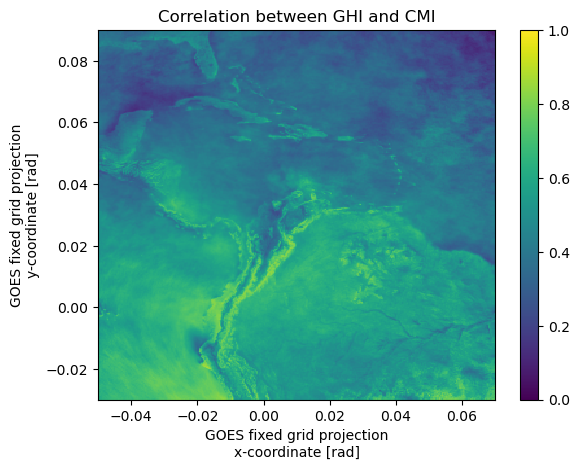

In [16]:
# Calculate and plot the correlation of GHI and CMI data
corr = xr.corr(ds_col.CMI, ghi_da, dim='t')

corr.plot(vmin=0, vmax = 1)
plt.title('Correlation between GHI and CMI')
plt.show()

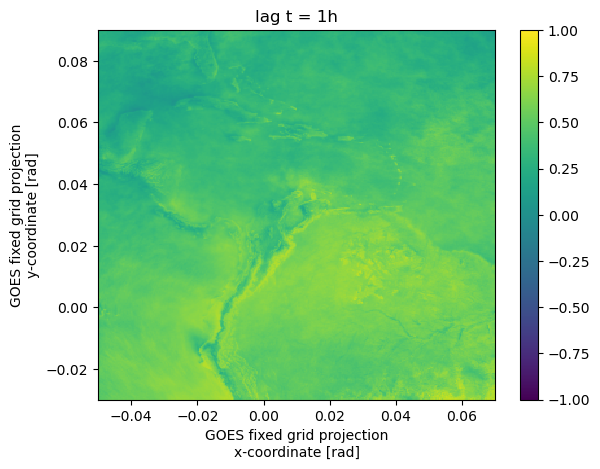

In [17]:
corr_lag = xr.corr(ds_col.CMI.shift(t=1), xr.DataArray(data=df.HorInsol_y), dim=('t'))
corr_lag.plot(vmin=-1, vmax = 1)
plt.title('lag t = 1h')
plt.show()

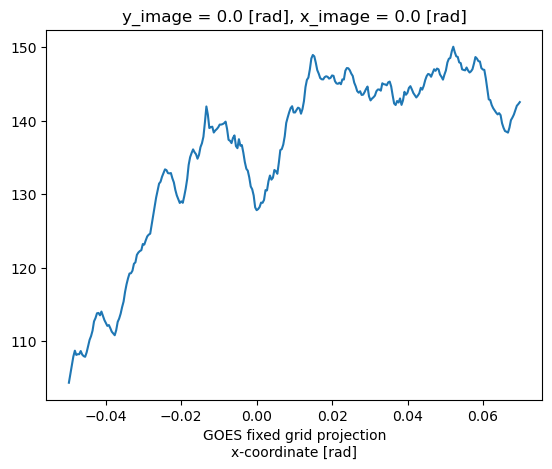

In [18]:
corr_lag.sum(dim='y').plot()


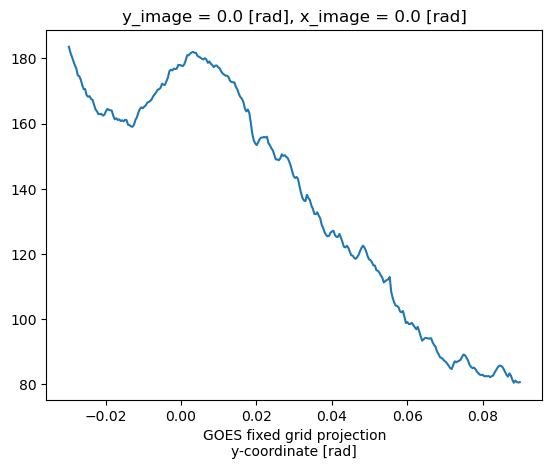

In [19]:
corr_lag.sum(dim='x').plot()

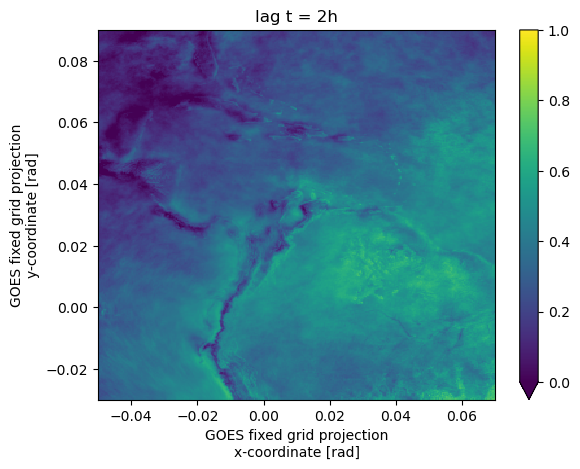

In [20]:
corr_lag = xr.corr(ds_col.CMI.shift(t=2), xr.DataArray(data=df.HorInsol_y), dim=('t'))
corr_lag.plot(vmin=0, vmax = 1)
plt.title('lag t = 2h')
plt.show()

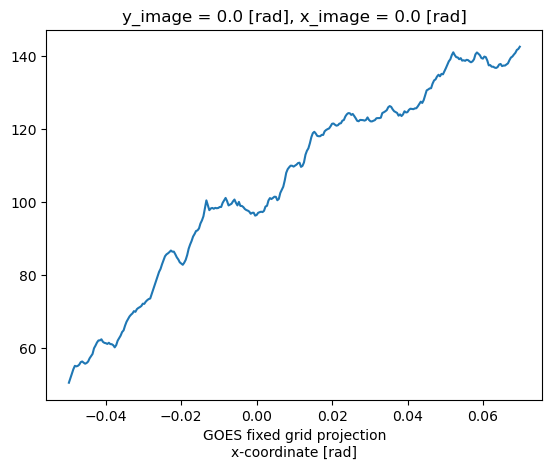

In [21]:
corr_lag.sum(dim='y').plot()

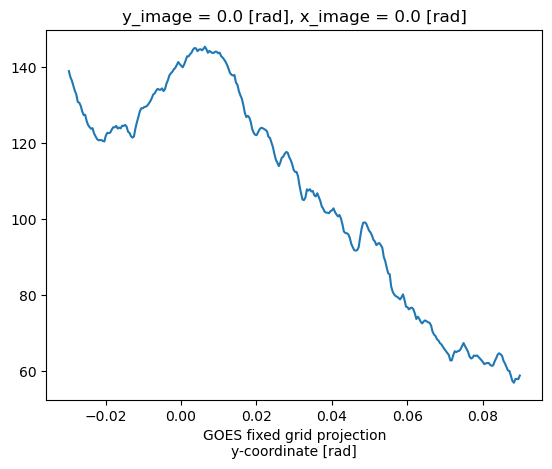

In [22]:
corr_lag.sum(dim='x').plot()

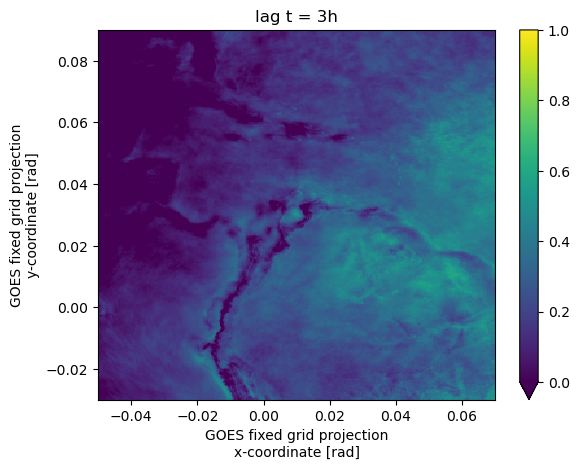

In [23]:
corr_lag = xr.corr(ds_col.CMI.shift(t=3), xr.DataArray(data=df.HorInsol_y), dim=('t'))
corr_lag.plot(vmin=0, vmax = 1)
plt.title('lag t = 3h')
plt.show()

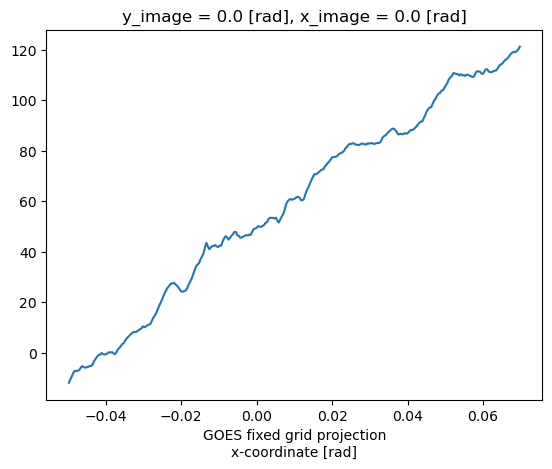

In [24]:
corr_lag.sum(dim='y').plot()

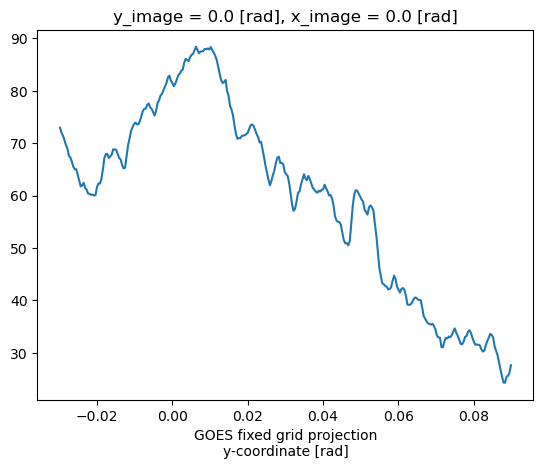

In [25]:
corr_lag.sum(dim='x').plot()

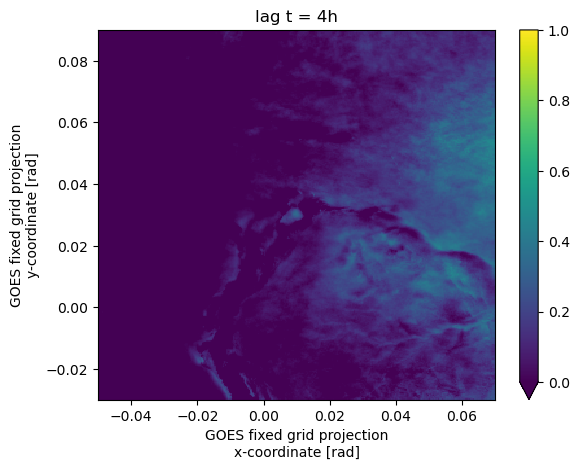

In [26]:
corr_lag = xr.corr(ds_col.CMI.shift(t=4), xr.DataArray(data=df.HorInsol_y), dim=('t'))
corr_lag.plot(vmin=0, vmax = 1)
plt.title('lag t = 4h')
plt.show()

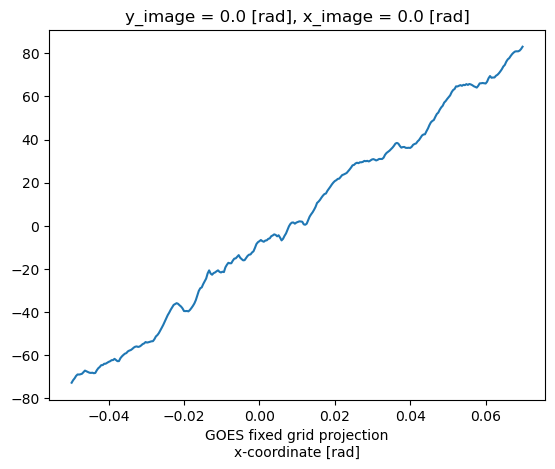

In [27]:
corr_lag.sum(dim='y').plot()

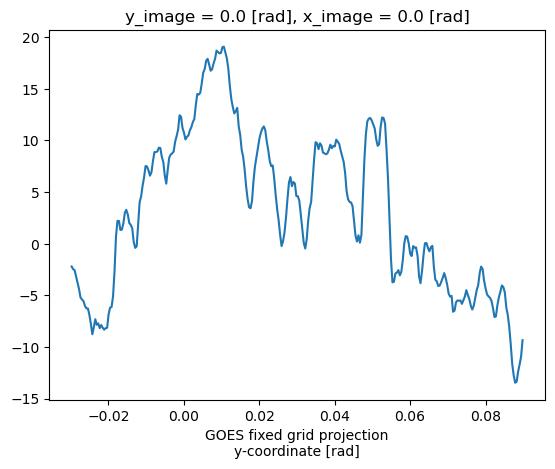

In [28]:
corr_lag.sum(dim='x').plot()

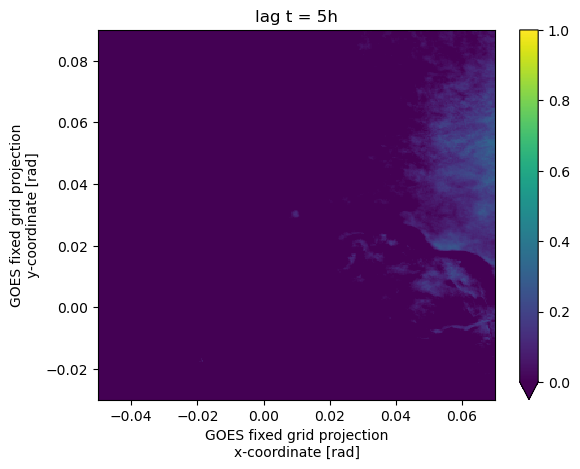

In [29]:
corr_lag = xr.corr(ds_col.CMI.shift(t=5), xr.DataArray(data=df.HorInsol_y), dim=('t'))
corr_lag.plot(vmin=0, vmax = 1)
plt.title('lag t = 5h')
plt.show()

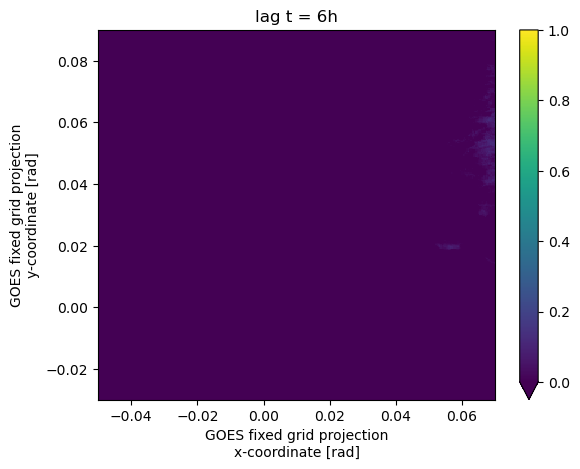

In [30]:
corr_lag = xr.corr(ds_col.CMI.shift(t=6), xr.DataArray(data=df.HorInsol_y), dim=('t'))
corr_lag.plot(vmin=0, vmax = 1)
plt.title('lag t = 6h')
plt.show()

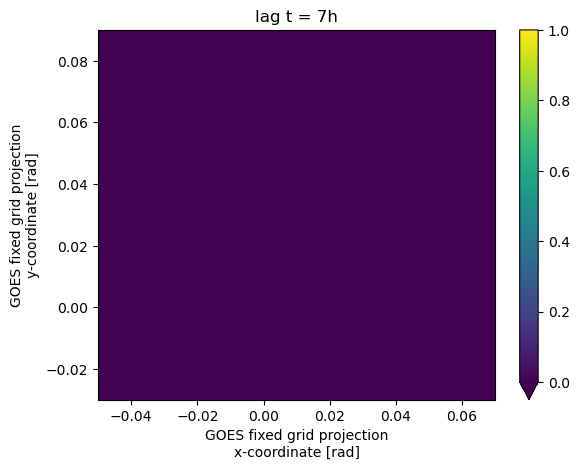

In [31]:
corr_lag = xr.corr(ds_col.CMI.shift(t=7), xr.DataArray(data=df.HorInsol_y), dim=('t'))
corr_lag.plot(vmin=0, vmax = 1)
plt.title('lag t = 7h')
plt.show()

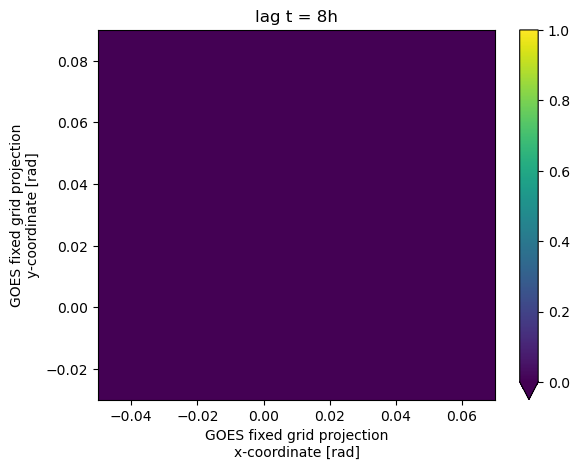

In [32]:
corr_lag = xr.corr(ds_col.CMI.shift(t=8), xr.DataArray(data=df.HorInsol_y), dim=('t'))
corr_lag.plot(vmin=0, vmax = 1)
plt.title('lag t = 8h')
plt.show()